In [1]:
!pip install xgboost
!pip install category_encoders
!pip install yellowbrick
import pandas as pd
from matplotlib import pyplot
import numpy as np
from matplotlib import pyplot as plt
import datetime as dt
import yellowbrick
import xgboost as xgb
from sklearn.svm import SVC 
from IPython.display import display

In [51]:
file = pd.read_csv('Resources/matches_final.csv')

In [52]:
file = file.drop_duplicates(subset=['date', 'time', 'comp', 'round', 'day', 'venue', 'result',
       'gf', 'ga', 'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain',
       'formation', 'referee', 'match report', 'sh', 'sot', 'dist',
       'fk', 'pk', 'pkatt', 'season', 'team'])

In [53]:
file['team'] = file['team'].replace(["Brighton and Hove Albion", "Manchester United", "Newcastle United", "Tottenham Hotspur", "West Ham United", "Wolverhampton Wanderers", "West Bromwich Albion", "Sheffield United", "Huddersfield Town"],["Brighton", "Manchester Utd", "Newcastle Utd", "Tottenham", "West Ham", "Wolves", "West Brom", "Sheffield Utd", "Huddersfield"])

# 1. Check the data

In [55]:
file.shape

(3800, 26)

In [57]:
file.dtypes

date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf                int64
ga                int64
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
sh              float64
sot             float64
dist            float64
fk              float64
pk              float64
pkatt           float64
season            int64
team             object
dtype: object

In [5]:
file['result'].unique()


array(['L', 'W', 'D'], dtype=object)

In [6]:
file['day'].value_counts()

Sat    1800
Sun     978
Wed     346
Tue     220
Mon     218
Thu     128
Fri     110
Name: day, dtype: int64

In [7]:
file.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,referee,match report,sh,sot,dist,fk,pk,pkatt,season,team
0,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0,1,Tottenham,...,Anthony Taylor,Match Report,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City
1,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5,0,Norwich City,...,Graham Scott,Match Report,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City
2,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5,0,Arsenal,...,Martin Atkinson,Match Report,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City
3,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1,0,Leicester City,...,Paul Tierney,Match Report,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City
4,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0,0,Southampton,...,Jonathan Moss,Match Report,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City


In [8]:
file['team'].value_counts().sort_values(ascending=False)

Manchester City    190
Burnley            190
Everton            190
Liverpool          190
Crystal Palace     190
Newcastle Utd      190
Southampton        190
Leicester City     190
Tottenham          190
West Ham           190
Manchester Utd     190
Chelsea            190
Arsenal            190
Brighton           190
Watford            152
Wolves             152
Aston Villa        114
Bournemouth        114
Leeds United        76
Norwich City        76
Fulham              76
West Brom           76
Sheffield Utd       76
Huddersfield        76
Brentford           38
Cardiff City        38
Swansea City        38
Stoke City          38
Name: team, dtype: int64

In [9]:
file['opponent'].value_counts().sort_values(ascending=False)

Tottenham          190
Leicester City     190
Southampton        190
Chelsea            190
Liverpool          190
Burnley            190
Brighton           190
Crystal Palace     190
Manchester Utd     190
Everton            190
West Ham           190
Manchester City    190
Newcastle Utd      190
Arsenal            190
Watford            152
Wolves             152
Aston Villa        114
Bournemouth        114
Leeds United        76
Norwich City        76
Sheffield Utd       76
Fulham              76
West Brom           76
Huddersfield        76
Brentford           38
Cardiff City        38
Stoke City          38
Swansea City        38
Name: opponent, dtype: int64

### Convert the date form string to datetime

In [10]:
file[["season", "month", "day_date"]] = file["date"].str.split("-", expand = True)

### Delete Month and day_date columns

In [11]:
del file["month"]
del file["day_date"]

In [12]:
file["date"] = pd.to_datetime(file["date"])

### Use Label Encoder for features

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import pickle
 
column_names = ['team','opponent','venue','day','result']

le= preprocessing.LabelEncoder()

encoded_df = file.copy()

dict_all = dict(zip([], []))

for col in column_names:
    temp_keys = encoded_df[col].values
    temp_values = le.fit_transform(encoded_df[col])
    dict_temp = dict(zip(temp_keys, temp_values))
    dict_all[col] = dict_temp

for col in column_names:
    encoded_df.replace(dict_all[col], inplace=True)
    
    
file_copy = encoded_df

print(dict_all)
filehandler = open("dict_all.obj","wb")
pickle.dump(dict_all,filehandler)
filehandler.close()

##Load a file
file = open("dict_all.obj",'rb')
dict_all_loaded = pickle.load(file)
file.close()

print(dict_all_loaded)
print(file)

{'team': {'Manchester City': 15, 'Liverpool': 14, 'Chelsea': 7, 'Tottenham': 23, 'Arsenal': 0, 'Manchester Utd': 16, 'West Ham': 26, 'Leicester City': 13, 'Brighton': 4, 'Wolves': 27, 'Newcastle Utd': 17, 'Crystal Palace': 8, 'Brentford': 3, 'Aston Villa': 1, 'Southampton': 20, 'Everton': 9, 'Leeds United': 12, 'Burnley': 5, 'Watford': 24, 'Norwich City': 18, 'Fulham': 10, 'West Brom': 25, 'Sheffield Utd': 19, 'Bournemouth': 2, 'Cardiff City': 6, 'Huddersfield': 11, 'Swansea City': 22, 'Stoke City': 21}, 'opponent': {'Tottenham': 23, 'Norwich City': 18, 'Arsenal': 0, 'Leicester City': 13, 'Southampton': 20, 'Chelsea': 7, 'Liverpool': 14, 'Burnley': 5, 'Brighton': 4, 'Crystal Palace': 8, 'Manchester Utd': 16, 'Everton': 9, 'West Ham': 26, 'Aston Villa': 1, 'Watford': 24, 'Wolves': 27, 'Leeds United': 12, 'Newcastle Utd': 17, 'Brentford': 3, 'Manchester City': 15, 'Sheffield Utd': 19, 'Fulham': 10, 'West Brom': 25, 'Bournemouth': 2, 'Huddersfield': 11, 'Cardiff City': 6, 'Stoke City': 21

In [14]:
file_corr=file_copy

# 3. Choose the Features by checking the corralations between them and the output

## Pick the columns which 

In [15]:
file_corr

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,referee,match report,sh,sot,dist,fk,pk,pkatt,season,team
0,2021-08-15,16:30,Premier League,Matchweek 1,3,0,1,0,1,23,...,Anthony Taylor,Match Report,18.0,4.0,16.9,1.0,0.0,0.0,2021,15
1,2021-08-21,15:00,Premier League,Matchweek 2,2,1,2,5,0,18,...,Graham Scott,Match Report,16.0,4.0,17.3,1.0,0.0,0.0,2021,15
2,2021-08-28,12:30,Premier League,Matchweek 3,2,1,2,5,0,0,...,Martin Atkinson,Match Report,25.0,10.0,14.3,0.0,0.0,0.0,2021,15
3,2021-09-11,15:00,Premier League,Matchweek 4,2,0,2,1,0,13,...,Paul Tierney,Match Report,25.0,8.0,14.0,0.0,0.0,0.0,2021,15
4,2021-09-18,15:00,Premier League,Matchweek 5,2,1,0,0,0,20,...,Jonathan Moss,Match Report,16.0,1.0,15.7,1.0,0.0,0.0,2021,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,2018-04-15,16:00,Premier League,Matchweek 34,3,0,2,1,0,16,...,Paul Tierney,Match Report,10.0,4.0,18.8,0.0,0.0,0.0,2018,25
3796,2018-04-21,12:30,Premier League,Matchweek 35,2,1,0,2,2,14,...,Stuart Attwell,Match Report,12.0,5.0,18.1,0.0,0.0,0.0,2018,25
3797,2018-04-28,15:00,Premier League,Matchweek 36,2,0,2,1,0,17,...,David Coote,Match Report,9.0,2.0,18.5,0.0,0.0,0.0,2018,25
3798,2018-05-05,15:00,Premier League,Matchweek 37,2,1,2,1,0,23,...,Mike Jones,Match Report,10.0,1.0,10.4,0.0,0.0,0.0,2018,25


## Define a function to select highly correlated features but remove the first feature that is correlated with other feature

In [21]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = file_corr.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
        return col_corr

In [22]:
corr_features = correlation(file_corr, 0.7)
len(set(corr_features))

0

### NO need to remove any Features from our training model because there is no strong coreelation between any 3 of these features

In [16]:
X = file_corr.drop(['comp','round','formation','referee','result','match report','poss', 'captain','date','time', 'gf', 'ga', 'attendance', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt','season'], axis =1) #add day, expected goals xq -home team
print(X)
y = file_corr['result'].values.reshape(-1,1)                

      day  venue  opponent   xg  xga  team
0       3      0        23  1.9  1.3    15
1       2      1        18  2.7  0.1    15
2       2      1         0  3.8  0.1    15
3       2      0        13  2.9  0.8    15
4       2      1        20  1.1  0.4    15
...   ...    ...       ...  ...  ...   ...
3795    3      0        16  0.8  1.0    25
3796    2      1        14  1.4  1.4    25
3797    2      0        17  0.8  1.5    25
3798    2      1        23  1.4  1.0    25
3799    3      0         8  0.3  2.4    25

[3800 rows x 6 columns]


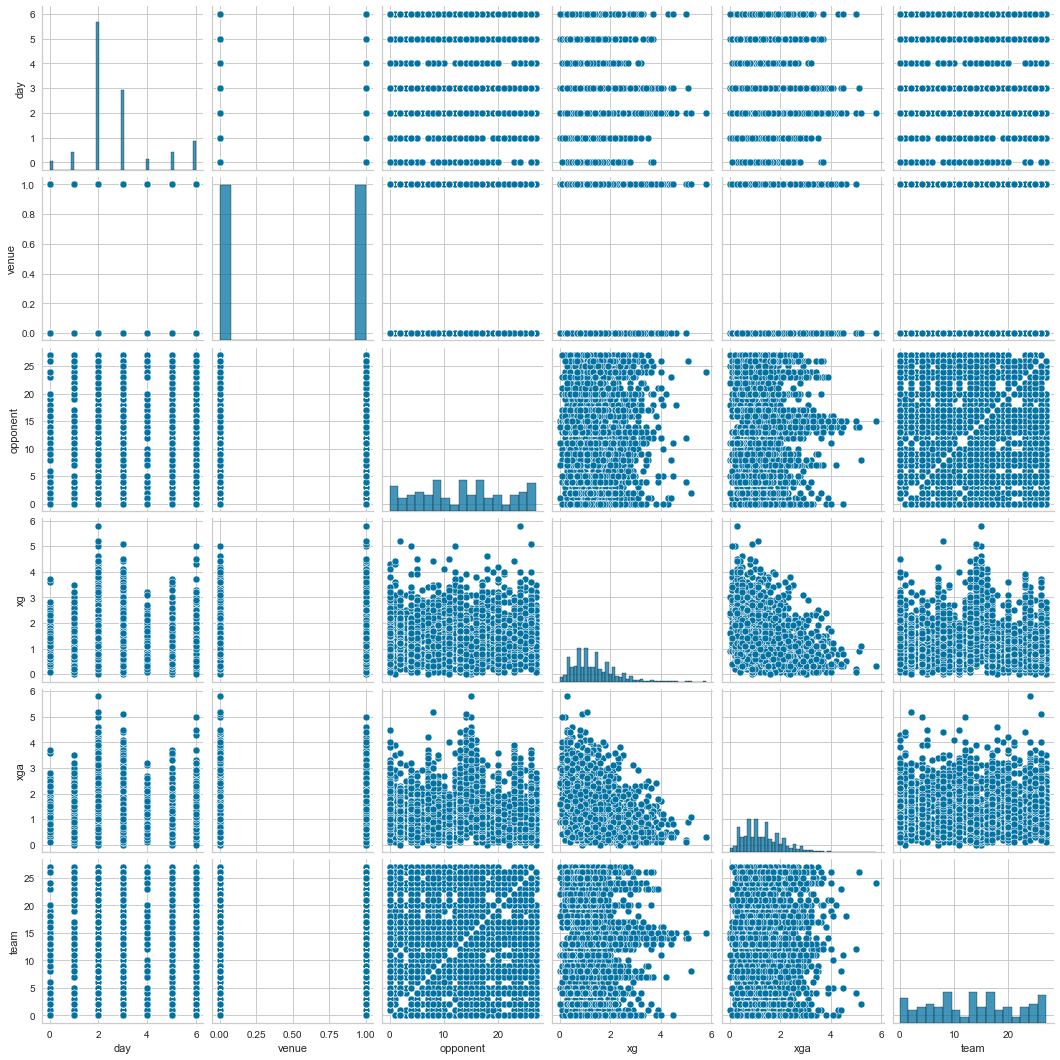

In [17]:
import seaborn
seaborn.pairplot(X)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
X_train.head()

,day,venue,opponent,xg,xga,team
1869,2,1,9,0.7,0.9,5
1611,2,0,15,1.6,2.0,16
2840,2,1,8,1.7,0.8,5
227,3,0,8,0.8,0.5,16
812,5,1,27,1.3,0.4,16


### Check the correlation between the Features we chose to use for training/testing

<AxesSubplot:>

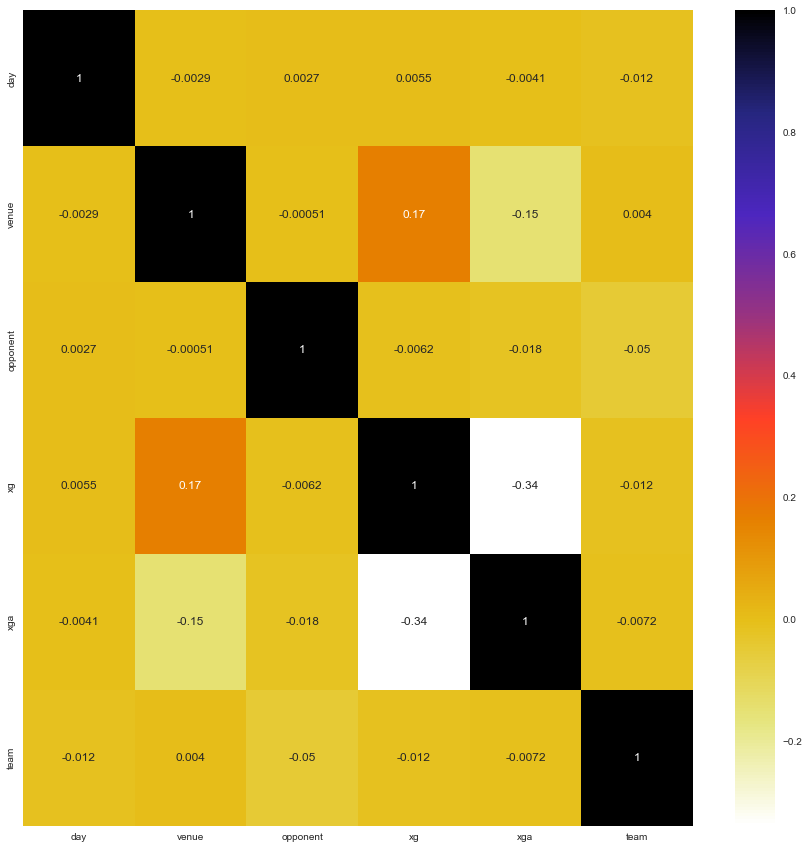

In [24]:
import seaborn as sns
plt.figure(figsize=(15,15))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)

## Use MinMaxScaler

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()

In [27]:
X_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train)

In [28]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# 1. Linear Regression Model

In [29]:
from sklearn.linear_model import LinearRegression
clf_A = LinearRegression()
clf_A.fit(X_train_scaled, y_train)
predictions = clf_A.predict(X_test_scaled)
r2 = clf_A.score(X_test_scaled, y_test)
r2

0.11952205158409845

# 2. SVC Model

In [30]:
clf_B = SVC(random_state = 42, kernel = 'rbf')
clf_B.fit(X_train_scaled, y_train)
predictions_B = clf_B.predict(X_test_scaled)
r2 = clf_B.score(X_test_scaled, y_test)
r2


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6073684210526316

In [31]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(clf_B, param_grid, verbose=3)

In [32]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .................C=1, gamma=0.0001;, score=0.386 total time=   0.5s


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .................C=1, gamma=0.0001;, score=0.386 total time=   0.4s


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .................C=1, gamma=0.0001;, score=0.384 total time=   0.4s


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .................C=1, gamma=0.0001;, score=0.384 total time=   0.4s


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .................C=1, gamma=0.0001;, score=0.384 total time=   0.4s


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..................C=1, gamma=0.001;, score=0.386 total time=   0.5s


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..................C=1, gamma=0.001;, score=0.386 total time=   0.5s


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..................C=1, gamma=0.001;, score=0.384 total time=   0.4s


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..................C=1, gamma=0.001;, score=0.384 total time=   0.4s


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..................C=1, gamma=0.001;, score=0.384 total time=   0.4s


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...................C=1, gamma=0.01;, score=0.500 total time=   0.4s


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...................C=1, gamma=0.01;, score=0.540 total time=   0.4s


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...................C=1, gamma=0.01;, score=0.561 total time=   0.4s


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...................C=1, gamma=0.01;, score=0.477 total time=   0.4s


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...................C=1, gamma=0.01;, score=0.518 total time=   0.4s


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .................C=5, gamma=0.0001;, score=0.386 total time=   0.5s


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .................C=5, gamma=0.0001;, score=0.386 total time=   0.5s


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .................C=5, gamma=0.0001;, score=0.384 total time=   0.5s


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .................C=5, gamma=0.0001;, score=0.384 total time=   0.5s


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .................C=5, gamma=0.0001;, score=0.384 total time=   0.4s


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..................C=5, gamma=0.001;, score=0.447 total time=   0.4s


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..................C=5, gamma=0.001;, score=0.479 total time=   0.4s


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..................C=5, gamma=0.001;, score=0.481 total time=   0.4s


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..................C=5, gamma=0.001;, score=0.423 total time=   0.5s


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..................C=5, gamma=0.001;, score=0.458 total time=   0.5s


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...................C=5, gamma=0.01;, score=0.589 total time=   0.4s


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...................C=5, gamma=0.01;, score=0.633 total time=   0.4s


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...................C=5, gamma=0.01;, score=0.602 total time=   0.4s


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...................C=5, gamma=0.01;, score=0.593 total time=   0.4s


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...................C=5, gamma=0.01;, score=0.588 total time=   0.4s


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ................C=10, gamma=0.0001;, score=0.386 total time=   0.5s


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ................C=10, gamma=0.0001;, score=0.386 total time=   0.5s


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ................C=10, gamma=0.0001;, score=0.384 total time=   0.4s


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ................C=10, gamma=0.0001;, score=0.384 total time=   0.5s


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ................C=10, gamma=0.0001;, score=0.384 total time=   0.4s


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .................C=10, gamma=0.001;, score=0.502 total time=   0.4s


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .................C=10, gamma=0.001;, score=0.540 total time=   0.4s


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .................C=10, gamma=0.001;, score=0.565 total time=   0.4s


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .................C=10, gamma=0.001;, score=0.479 total time=   0.4s


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .................C=10, gamma=0.001;, score=0.519 total time=   0.4s


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..................C=10, gamma=0.01;, score=0.591 total time=   0.4s


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..................C=10, gamma=0.01;, score=0.635 total time=   0.4s


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..................C=10, gamma=0.01;, score=0.596 total time=   0.4s


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..................C=10, gamma=0.01;, score=0.598 total time=   0.4s


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..................C=10, gamma=0.01;, score=0.593 total time=   0.4s


/Users/jsacharz/opt/anaconda3/envs/messing_around/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(estimator=SVC(random_state=42),
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
             verbose=3)

In [33]:
print(grid.best_params_)

{'C': 10, 'gamma': 0.01}


In [34]:
predictions = grid.predict(X_test_scaled)

In [35]:
grid.score(X_test_scaled, y_test)

0.62

In [36]:
filename = 'finalized_model.sav'
filename_minmax = 'min_max_scalar.sav'

pickle.dump(grid, open(filename, 'wb'))
pickle.dump(scaler, open(filename_minmax, 'wb'))

# 3. XGBoost

In [37]:
clf_C = xgb.XGBClassifier(seed = 42)
clf_C.fit(X_train_scaled, y_train)
predictions_B = clf_C.predict(X_test_scaled)
r2 = clf_B.score(X_test_scaled, y_test)
r2

0.6073684210526316

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_B))

              precision    recall  f1-score   support

           0       0.30      0.25      0.27       203
           1       0.61      0.64      0.62       370
           2       0.61      0.62      0.61       377

    accuracy                           0.55       950
   macro avg       0.50      0.51      0.50       950
weighted avg       0.54      0.55      0.54       950



# 4. Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train)
predictions_rf = rf.predict(X_test_scaled)

print(rf.score(X_train_scaled, y_train))
print(rf.score(X_test_scaled, y_test))

/var/folders/c1/_wjd1nqx03q7043fsjpcgjd80000gn/T/ipykernel_98945/98002618.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = rf.fit(X_train_scaled, y_train)


1.0
0.5778947368421052


In [40]:
importances = rf.feature_importances_
importances

array([0.09144214, 0.0315771 , 0.18268232, 0.26343872, 0.24875769,
       0.18210202])

In [41]:
sorted(zip(rf.feature_importances_, X_train.columns), reverse=True)

[(0.2634387235426367, 'xg'),
 (0.24875769000278336, 'xga'),
 (0.18268232183095373, 'opponent'),
 (0.1821020224665915, 'team'),
 (0.09144213923259989, 'day'),
 (0.03157710292443488, 'venue')]

In [42]:
print(classification_report(y_test, predictions_rf))

              precision    recall  f1-score   support

           0       0.30      0.20      0.24       203
           1       0.63      0.69      0.66       370
           2       0.62      0.67      0.64       377

    accuracy                           0.58       950
   macro avg       0.52      0.52      0.51       950
weighted avg       0.55      0.58      0.56       950



### Saving the model

In [43]:
filename = 'finalized_model.sav'
filename_le = 'label_encoder.sav'
filename_minmax = 'min_max_scalar.sav'

pickle.dump(rf, open(filename, 'wb'))
# pickle.dump(le, open(filename_le, 'wb'))
pickle.dump(scaler, open(filename_minmax, 'wb'))

In [44]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_scaled, y_test)

In [45]:
loaded_model.predict(X_test_scaled[:1])

array([2])

### Test model with your input

In [46]:
X.columns

Index(['day', 'venue', 'opponent', 'xg', 'xga', 'team'], dtype='object')

In [47]:
new_input = [['1', '0', '0.2', '0.4', '15', '25']]

In [48]:
rf.predict([['1', '0', '0.9', '0.4', '11', '10']])
# clf.predict([[3, 5, 4, 2]])

array([1])